# Parcial Modelos Computacionales II
### Claudia Coutiño

Usar los métodos de ML No Supervisado en: (k-means, Gaussian mixture, cluster jerárquico)

# Parte I: 
Dataset de Coactivation matrx
+ 

Utilizar el método de codo para determinar el número de clus ertóp imo (adea* 
+ o)
Usando el número de clusters encontrado por el método del cods, u ar k-means y gaussian mixture en esttasetre



In [72]:
# Importar todas las paqueterías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
#import bct
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [21]:
# Cargar dataset
mat_path = r"C:\Users\clau\Desktop\Repo-2025\Coactivation_matrix.mat"
mat_json = scipy.io.loadmat(mat_path)

In [23]:
mat_data = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_data
mat_data.keys()

dict_keys(['Coactivation_matrix', 'Coord'])

In [38]:
# Inspeccionar dimensiones de la matriz
coactivation_matrix = mat_data['Coactivation_matrix']
coactivation_matrix.shape # (638, 638)-> 638 regiones o nodos

(638, 638)

### Método del Codo-> Encontrar no. óptimo de clusters

In [28]:
# Convertir matriz-> vectores por fila (Para el Clustering)
X = coactivation_matrix

In [46]:
# Calcular Inertia para diferentes valores de k
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

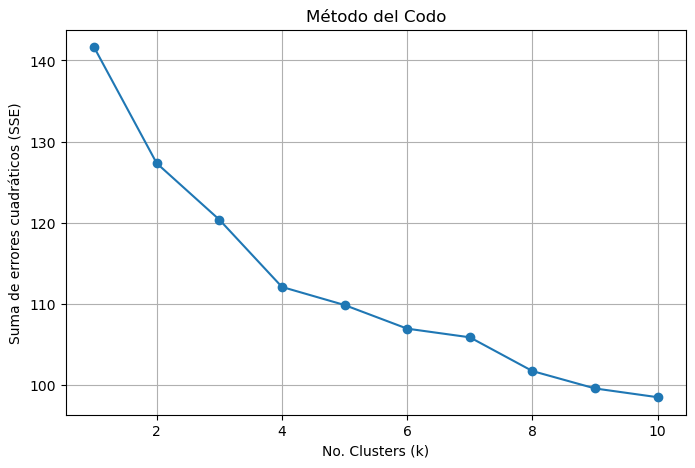

In [48]:
# Graficar
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('No. Clusters (k)')
plt.ylabel('Suma de errores cuadráticos (SSE)') # Inertia
plt.title('Método del Codo')
plt.grid(True)
plt.show()

Para determinar el no. óptimo de clusters se utilizó el método del codo, que evalúa la suma de errores cuadráticos (SSE) para distintos valores de 𝑘.
+ La curva se empieza a aplanar (mejora decreciente) alrededor de k = 3-4, por lo que podría ser un número óptimo de clusters
+ Para este análisis, se seleccionó k=3

### K-Means
Aplicar algoritmo sobre los vectores de coactivación (cada fila como una instancia)-> Se asignó 638 en 3 grupos. Se asume que los clusters son aprox. esféricos y de varianza similar (puede ser bueno para verificación inicial).

In [50]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
print("K-Means labels:", kmeans_labels[:10]) # Ver los primeros resultados

K-Means labels: [1 1 1 1 1 1 1 0 1 1]


### Gaussian Mixture Model (GMM)
Se asumen los datos tienen una mezcla de distribuciones gaussianas (es más flexible y puede capturar relaciones más complejas)

In [52]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(X)
print("GMM labels:", gmm_labels[:10])

GMM labels: [1 1 1 1 1 1 1 0 1 1]


In [58]:
# Visualización- reducir a 2 dimensiones utilizando PCA
# Para ver la distribución de puntos según las etiquetas asignadas por cada método -ver estructura supuesta por cada modelo-)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

Text(0.5, 1.0, 'K-Means Clustering (k=3)')

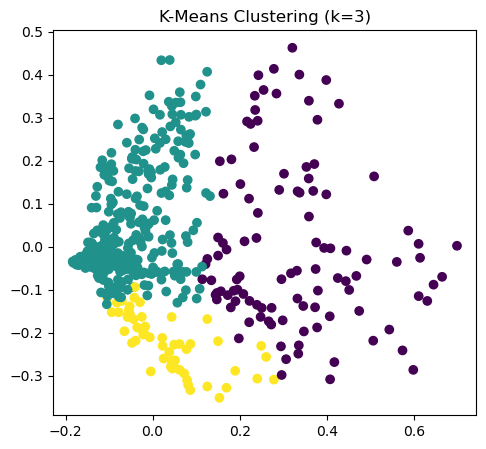

In [60]:
# Plot K-Means
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering (k=3)")

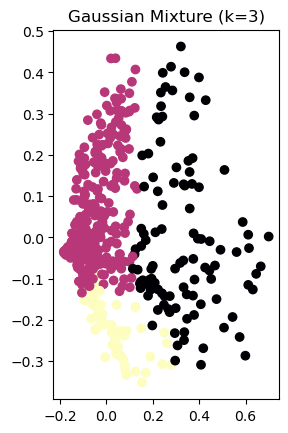

In [66]:
# Plot GMM
plt.subplot(1, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='magma')
plt.title("Gaussian Mixture (k=3)")
plt.show()

# Parte II: Brain tumor
* Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
* Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth
* ¿Qué método recomendarías para este dataset?, ¿por qué?

In [68]:
# Cargar dataset
path_bt = r"C:\Users\clau\Desktop\Repo-2025\Brain Tumor.csv"
df = pd.read_csv(path_bt) # Definir path
df.head() # Primeros valores

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


### Preparar los datos

In [112]:
# Excluir columnas no numéricas (porque no aportan nada) y la columna 'Class' para el clustering
X = df.drop(columns=["Image", "Class"])

# Normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_true = df["Class"].values # Guardar variable y etiquetas verdaderas
X.shape, X_scaled[:3] # Dimensiones y datos normalizados

((3762, 13),
 array([[-5.15700406e-001, -1.95790086e-001, -3.31438025e-002,
          5.04650142e-001,  6.78552579e-002, -9.72667778e-002,
         -2.68050200e-001,  6.85118050e-001,  4.70073392e-001,
          4.04099833e-001, -1.21708574e-001,  1.00071256e+000,
         -1.11785692e-168],
        [-1.29018130e-001,  2.02943099e-001,  3.65594000e-001,
          2.74604991e+000, -1.50203606e-001, -1.75880525e-001,
         -5.85492224e-001,  2.09028734e+000,  2.86558024e+000,
          1.34545658e+000, -7.99180836e-001,  1.26437684e+000,
         -1.11785692e-168],
        [-3.75012617e-001,  9.25765400e-001,  9.84679519e-001,
         -1.02670752e+000,  3.74530866e-001,  3.70475637e-002,
         -4.21009579e-001, -1.33598137e+000, -9.88339974e-001,
         -1.64939073e+000,  6.93704391e-001,  8.50635907e-001,
         -1.11785692e-168]]))

In [98]:
# Verificar datos
print("Media post-normalización:", np.mean(X_scaled, axis=0)) # Media de cada columna debe ser 0 aprox.
print("Desviación estándar post-normalización:", np.std(X_scaled, axis=0)) # Desviación estándar de cada columna debe ser 1 aprox.

Media post-normalización: [ 1.43543987e-016 -1.28434094e-016  2.94642921e-016 -1.81318720e-016
  9.82143069e-017 -7.55494669e-018  7.55494669e-017 -9.06593602e-017
  3.02197867e-017 -4.23077014e-016  1.20879147e-016  3.21085234e-016
 -4.72569516e-171]
Desviación estándar post-normalización: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


### Método del Codo
+ Con K-means para determinar no. óptimo de clusters

In [78]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

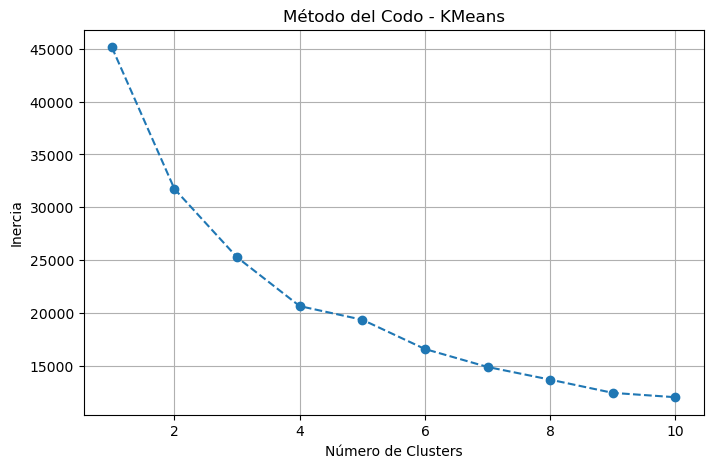

In [80]:
# Gráficar
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Método del Codo - KMeans')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show() # El "codo" está en el 4, creo...

### K-means
+ KMeans funciona bien si los clusters son esféricos y del mismo tamaño.

In [88]:
from sklearn.metrics import confusion_matrix

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
cm_kmeans = confusion_matrix(df["Class"], kmeans_labels)
print("Matriz de Confusión - KMeans:\n", cm_kmeans)

Matriz de Confusión - KMeans:
 [[1978  101]
 [  80 1603]]


### Gaussian Mixture Model (GMM)
+ GMM es más flexible, especialmente si los clusters tienen formas elípticas o solapamiento.

In [90]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
cm_gmm = confusion_matrix(df["Class"], gmm_labels)
print("Matriz de Confusión - GMM:\n", cm_gmm)

Matriz de Confusión - GMM:
 [[2056   23]
 [  60 1623]]


### Agglomerative Clustering (Jerárquico)
+ Clustering jerárquico puede detectar estructuras más complejas, pero no escala tan bien con muchos datos

In [92]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=2)
hier_labels = hier.fit_predict(X_scaled)
cm_hier = confusion_matrix(df["Class"], hier_labels)
print("Matriz de Confusión - Clustering Jerárquico:\n", cm_hier)

Matriz de Confusión - Clustering Jerárquico:
 [[  26 2053]
 [1589   94]]


# Parte III: De su previa investigación

Métricas para verificar si estuvo bien realizada la clasificación

**Qué es precision?**
De todos los que se predijeron como positivos, ¿cuántos realmente lo eran?
+ Muy útil para falsos positivos

**Qué es accuracy?**
Exactitud-> ¿Qué tan bien clasificó en general?
+ Da la proporción total de predicciones correctas, pero puede ser engañosa si las clases están desbalanceadas

**Qué es recall?**
Sensibilidad / Tasa de Verdaderos Positivos
+ De todos los casos reales positivos, ¿cuántos se encontraron?
+ Para no pasar por alto un caso real (falsos negativos)

**Qué es f1-score?**
Es el promedio armónico, combina precisión y recall.​
+ Penaliza si una de variable es baja

# Parte IV
Cómo se relacionan las definiciones anteriores a la matriz de confusión?

Para los valores del dataset de Tumores Cerebrales, se podrían clasificar como: Clase 0 (No tumoral), Clase 1 (Tumoral), en la matriz de confusión:
                              Predicho 0	                Predicho 1
Real 0 (No tumoral)	     Verdadero Negativo (TN)	  Falso Positivo (FP)
Real 1 (Tumoral)	      Falso Negativo (FN)	    Verdadero Positivo (TP)

Precision = TP / TP+FP
Accuracy = (TP+TN) / (TP+TN+FP+FN)
Recall = TP / (TP+FN)
F1 = 2 * (Precision*Recall) / (Precision+Recall)

*Ejemplo con Kmeans*
+ Aciertos totales: 1978 (Clase 0 bien predicha) + 1603 (Clase 1 bien predicha) = 3581
+ Errores: 101 + 80 = 181
+ Accuracy estimada: 3581 / (1978+101+80+1603) = ≈ 95.2%

# Parte V
A partir del resultado de 2.B (2 cluster para Brain Tumor), calcular precision, accuracy, recall y f1-score

In [108]:
# Calcular las métricas mediante una función
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def metricas(y_true, y_pred):
    return {
        'Precision': precision_score(y_true, y_pred),
        'Accuracy': accuracy_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

y_true = df['Class']  # La columna real (ground truth)
y_pred_kmeans = kmeans_labels  # Asegúrate de que tenga el mismo orden que y_true
y_pred_gmm = gmm_labels
y_pred_hier = hier_labels

In [110]:
# Evaluar para cada métrica
print("KMeans:", metricas(y_true, y_pred_kmeans)) # KMeans
print("GMM:", metricas(y_true, y_pred_gmm)) # GMM
print("Jerárquico:", metricas(y_true, y_pred_hier)) # Jerárquico

KMeans: {'Precision': 0.9407276995305164, 'Accuracy': 0.9518872939925571, 'Recall': 0.952465834818776, 'F1-Score': 0.9465603779155595}
GMM: {'Precision': 0.9860267314702309, 'Accuracy': 0.9779372674109517, 'Recall': 0.964349376114082, 'F1-Score': 0.9750675878642235}
Jerárquico: {'Precision': 0.043782021425244524, 'Accuracy': 0.03189792663476874, 'Recall': 0.055852644087938205, 'F1-Score': 0.04908616187989556}


Entre los métodos, el modelo Gaussian Mixture Models (GMM) presentó el mejor desempeño con una exactitud del 97.8%, precisión del 98.6%, y equilibrio entre sensibilidad y especificidad, reflejado en F1-score (97.5%). En contraste, el jerárquico mostró un rendimiento pobre, por lo que no logró identificar adecuadamente los patrones del dataset.